# Visualize Interpretation Approach for GTEx Blood Features

**Gregory Way, 2018**

Visualizing the interpretation of compression results across two VAE models.
This informs downstream analyses.
Also, create a supplementary figure.

An additional main figure is generated in a later notebook.

In [1]:
suppressPackageStartupMessages(library(dplyr))

suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(cowplot))

## Visualize the Compression Interpretation Implementation

In [2]:
results_file <- file.path('results', 'gtex_vae_example_interpret_compression.tsv')
interpret_data_df <- (
    readr::read_tsv(results_file,
                    col_types = readr::cols(.default = readr::col_character(),
                                            raw_score = readr::col_double(),
                                            z_score = readr::col_double()))
    )

interpret_data_df$full_feature <- factor(interpret_data_df$full_feature,
                                  levels = c("vae_0_two", "vae_1_two", "vae_0_three",
                                             "vae_1_three", "vae_2_three"))

head(interpret_data_df)

model_type,full_feature,variable,raw_score,z_score
real,vae_2_three,Keratinocytes_HPCA_3,-10.901510,-33.32254
real,vae_1_two,Keratinocytes_HPCA_3,-10.564337,-30.32630
real,vae_1_three,Sebocytes_FANTOM_3,-9.071379,-25.20342
real,vae_2_three,Keratinocytes_ENCODE_1,-6.572572,-23.50536
real,vae_1_three,Sebocytes_FANTOM_1,-8.317615,-21.20593
real,vae_2_three,Sebocytes_FANTOM_1,-6.761970,-19.13752


In [3]:
# Setup plotting logic
vae_labels <- c("vae_0_two" = "k = 2 (0)",
                "vae_1_two" = "k = 2 (1)",
                "vae_0_three" = "k = 3 (0)",
                "vae_1_three" = "k = 3 (1)",
                "vae_2_three" = "k = 3 (2)")

vae_colors <- c("#c994c7",
                "#dd1c77",
                "#78c679",
                "#31a354",
                "#006837")

In [4]:
color_logic <- (interpret_data_df$z_score > 13 | interpret_data_df$z_score < -18)

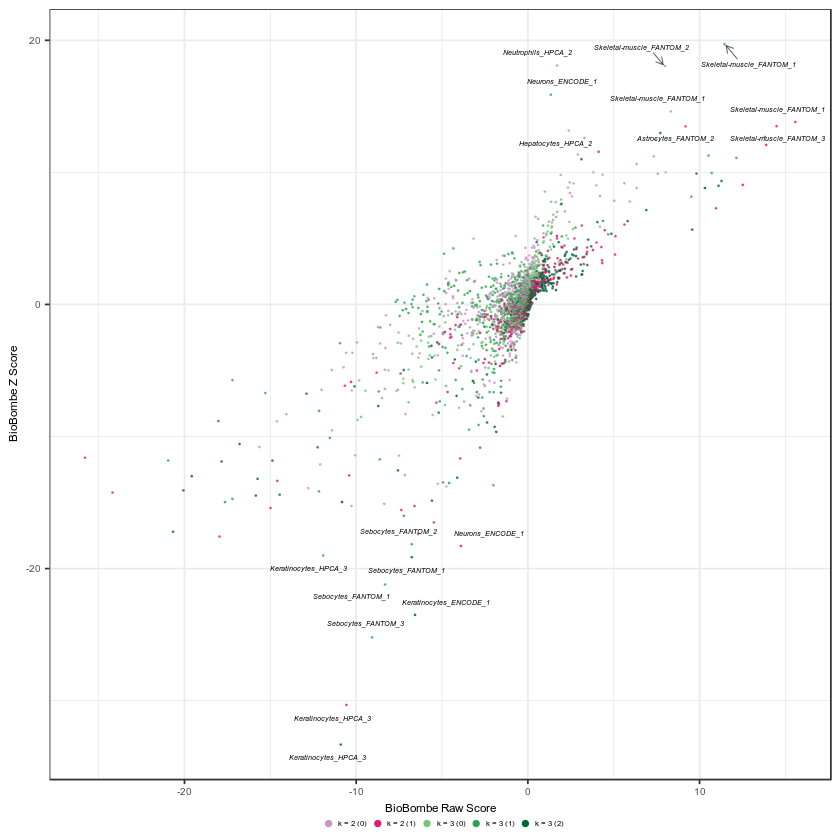

In [5]:
ggplot(interpret_data_df,
                     aes(x = raw_score,
                         y = z_score)) +
    geom_point(aes(color = full_feature),
               size = 0.14,
               alpha = 0.65) +
    scale_color_manual(name = "",
                       values = vae_colors,
                       labels =  vae_labels) +
    geom_text_repel(data = subset(interpret_data_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = raw_score,
                        y = z_score,
                        label = variable)) +
    xlab("BioBombe Raw Score") +
    ylab("BioBombe Z Score") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.position = 'bottom',
          legend.text = element_text(size = 4.7),
          legend.margin = margin(0, 0, 0, 0),
          legend.box.margin = margin(-8, 0, 0, 0)) +
    guides(color = guide_legend(nrow = 1,
                                ncol = 5,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)))

fig_file <- file.path("figures", "interpret_compression_vae_neutrophils.png")
ggsave(fig_file,
       height = 90,
       width = 105,
       dpi = 300,
       units = "mm")

## Supplementary Figure Panel A: Visualize the Overrepresentation Results

In [6]:
results_file <- file.path('results', 'gtex_vae_example_overrepresentation.tsv')
overrep_data_df <- (
    readr::read_tsv(results_file,
                    col_types = readr::cols(.default = readr::col_integer(),
                                            variable = readr::col_character(),
                                            full_feature = readr::col_character(),
                                            odds = readr::col_double(),
                                            pval = readr::col_double(),
                                            tailed = readr::col_character()))
    )

overrep_data_df$full_feature <- factor(overrep_data_df$full_feature,
                                       levels = c("vae_0_two",
                                                  "vae_1_two",
                                                  "vae_0_three",
                                                  "vae_1_three",
                                                  "vae_2_three"))

overrep_data_df$neg_log10_p <- -log10(overrep_data_df$pval)
head(overrep_data_df %>% dplyr::arrange(desc(neg_log10_p)))

variable,pval,odds,full_feature,tailed,neg_log10_p
Keratinocytes_FANTOM_3,2.455426e-22,18.49730,vae_1_three,neg,21.60987
Keratinocytes_FANTOM_2,1.569034e-21,18.27418,vae_1_three,neg,20.80437
Keratinocytes_FANTOM_1,1.069778e-19,11.36356,vae_1_three,neg,18.97071
Keratinocytes_HPCA_3,3.081031e-19,22.05901,vae_1_three,neg,18.51130
Skeletal-muscle_FANTOM_2,1.833130e-18,26.29440,vae_0_two,pos,17.73681
Keratinocytes_HPCA_2,1.561197e-17,17.05444,vae_1_three,neg,16.80654


In [7]:
color_logic <- overrep_data_df$neg_log10_p > 10

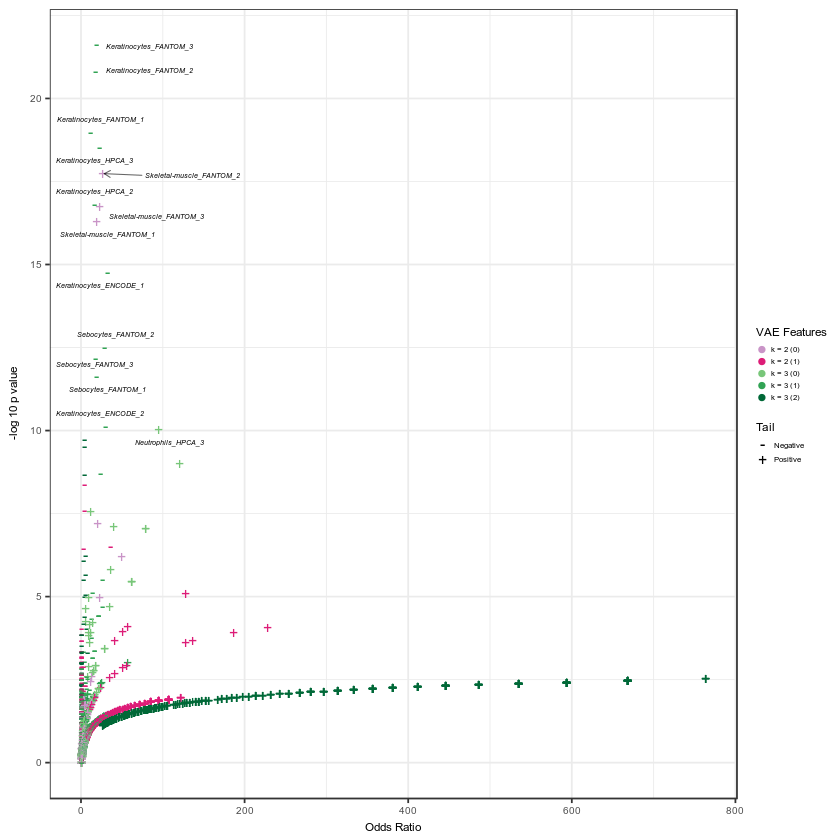

In [8]:
# Create Panel A for a Supplementary Figure
sup_panel_a_gg <- ggplot(overrep_data_df,
                         aes(x = odds,
                             y = neg_log10_p,
                             shape = tailed)) +
    geom_point(aes(color = as.factor(full_feature)),
                   size = 3) +
    scale_color_manual(name = "VAE Features",
                       values = vae_colors,
                       labels =  vae_labels) +
    scale_shape_manual(name = "Tail",
                       values = c("-", "+"),
                       labels = c("pos" = "Positive",
                                  "neg" = "Negative")) +
    geom_text_repel(data = subset(overrep_data_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = odds,
                        y = neg_log10_p,
                        label = variable)) +
    xlab("Odds Ratio") +
    ylab("-log 10 p value") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.position = 'right',
          legend.title = element_text(size = 7),
          legend.text = element_text(size = 4.7),
          legend.margin = margin(0, 0, 0, 0),
          legend.box.margin = margin(-8, 0, 0, 0)) +
    guides(color = guide_legend(order = 1,
                                nrow = 5,
                                ncol = 1,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)),
           shape = guide_legend(order = 2,
                                nrow = 2,
                                ncol = 1,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch"))

sup_panel_a_gg

## Supplementary Figure Panel B: Compare BioBombe Network Projection Approach with Overrepresentation

### Combine Results and Plot in Single Figure

In [9]:
combined_results_df <- overrep_data_df %>%
    dplyr::full_join(interpret_data_df,
                     by = c('variable', 'full_feature'))

head(combined_results_df)

variable,pval,odds,full_feature,tailed,neg_log10_p,model_type,raw_score,z_score
Keratinocytes_FANTOM_3,2.455426e-22,18.49730,vae_1_three,neg,21.60987,real,-17.642717,-14.96365
Keratinocytes_FANTOM_2,1.569034e-21,18.27418,vae_1_three,neg,20.80437,real,-17.210515,-14.71681
Keratinocytes_FANTOM_1,1.069778e-19,11.36356,vae_1_three,neg,18.97071,real,-20.945504,-11.81928
Keratinocytes_HPCA_3,3.081031e-19,22.05901,vae_1_three,neg,18.51130,real,-11.919360,-19.00494
Skeletal-muscle_FANTOM_2,1.833130e-18,26.29440,vae_0_two,pos,17.73681,real,7.981099,18.05253
Keratinocytes_HPCA_2,1.561197e-17,17.05444,vae_1_three,neg,16.80654,real,-12.166610,-14.14869


In [10]:
color_logic <- (combined_results_df$z_score > 14 |
                combined_results_df$z_score < -20 |
                combined_results_df$neg_log10_p > 13)

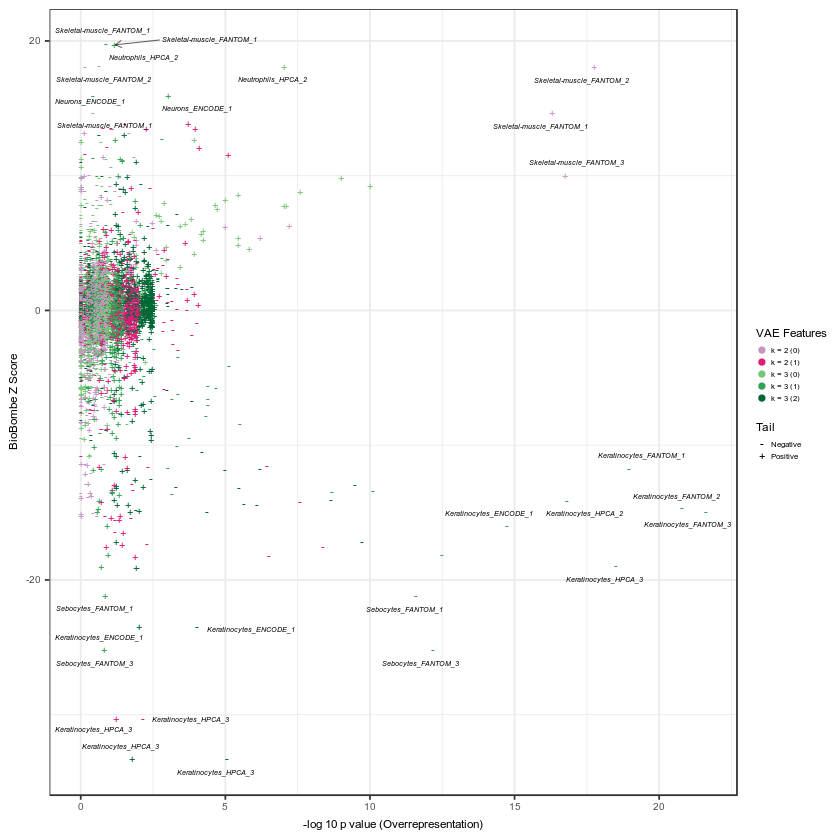

In [11]:
sup_panel_b_gg <- ggplot(combined_results_df,
                         aes(x = neg_log10_p,
                             y = z_score,
                             shape = tailed)) +
    geom_point(aes(color = as.factor(full_feature)),
               size = 2) +
    scale_color_manual(name = "VAE Features",
                       values = vae_colors,
                       labels =  vae_labels) +
    scale_shape_manual(name = "Tail",
                       values = c("-", "+"),
                       labels = c("pos" = "Positive",
                                  "neg" = "Negative")) +
    geom_text_repel(data = subset(combined_results_df, color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.25,
                    point.padding = 0.15,
                    aes(x = neg_log10_p,
                        y = z_score,
                        label = variable)) +
    ylab("BioBombe Z Score") +
    xlab("-log 10 p value (Overrepresentation)") +
    theme_bw() +
    theme(axis.title = element_text(size = 7),
          axis.text.x = element_text(size = 6),
          axis.text.y = element_text(size = 6),
          legend.position = 'right',
          legend.title = element_text(size = 7),
          legend.text = element_text(size = 4.7),
          legend.margin = margin(0, 0, 0, 0),
          legend.box.margin = margin(-8, 0, 0, 0)) +
    guides(color = guide_legend(order = 1,
                                nrow = 5,
                                ncol = 1,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch",
                                override.aes = list(size = 1.4,
                                                    alpha = 1)),
           shape = guide_legend(order = 2,
                                nrow = 2,
                                ncol = 1,
                                byrow = FALSE,
                                keywidth = 0.1,
                                keyheight = 0.1,
                                default.unit = "inch"))

sup_panel_b_gg

## Determine which features are most differential between VAE k = 2 and VAE k = 3

In [12]:
file <- file.path('results', 'gtex_vae_example_differentiating_features.tsv')
feature_info_df <- readr::read_tsv(file,
                                   col_types = readr::cols(.default = readr::col_double(),
                                                           variable = readr::col_character()))

In [13]:
color_logic = (feature_info_df$abs_diff > 3.5 |
               feature_info_df$two > 13  |
               feature_info_df$three > 13)

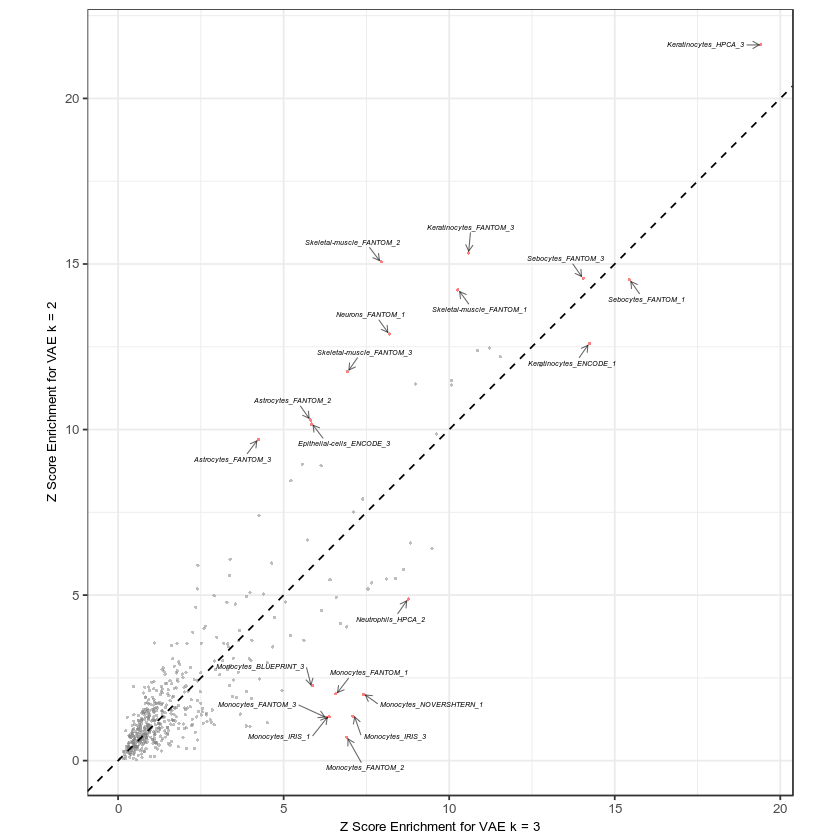

In [14]:
ggplot(feature_info_df,
       aes(x = three,
           y = two)) +
    geom_point(alpha = 0.5,
               size = 0.6,
               shape = 16,
               color = ifelse(color_logic,
                              "red",
                              "grey50")) +
    theme_bw() +
    theme(axis.text.x = element_text(size = 8),
          axis.text.y = element_text(size = 8),
          axis.title = element_text(size = 8)) +
    geom_abline(intercept = 0,
                slope = 1,
                linetype = 'dashed') +
    coord_fixed() +
    geom_text_repel(data = subset(feature_info_df,color_logic),
                    arrow = arrow(length = unit(0.01, "npc")),
                    segment.size = 0.3,
                    segment.alpha = 0.6,
                    size = 1.5,
                    fontface = "italic",
                    box.padding = 0.55,
                    point.padding = 0.15,
                    aes(x = three,
                        y = two,
                        label = variable)) +
    xlab("Z Score Enrichment for VAE k = 3") +
    ylab("Z Score Enrichment for VAE k = 2")

fig_file <- file.path("figures", "vae_feature_differences_2vs3.png")
ggsave(fig_file,
       height = 90,
       width = 105,
       dpi = 300,
       units = "mm")

## Compile Supplementary Figure

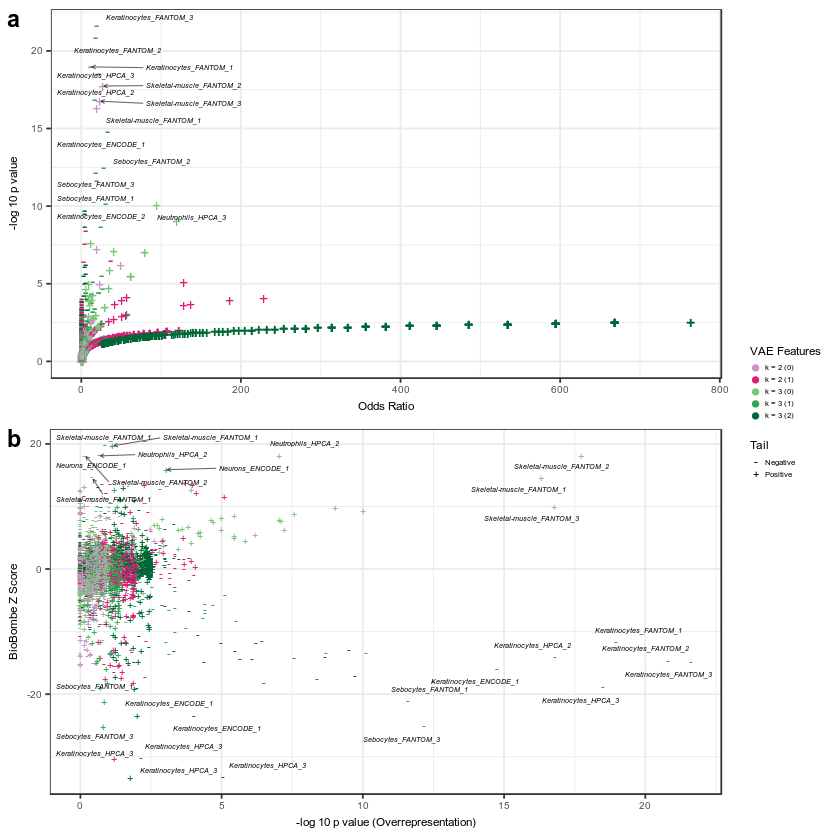

In [15]:
legend_gg <- cowplot::get_legend(sup_panel_b_gg)

sup_gg <- cowplot::plot_grid(
    sup_panel_a_gg +
        theme(legend.position = 'none'),
    sup_panel_b_gg +
        theme(legend.position = 'none'),
    nrow = 2,
    labels = c("a", "b"),
    rel_heights = c(1, 1)
)

sup_gg = cowplot::plot_grid(sup_gg,
                            legend_gg,
                            rel_widths = c(1, 0.15),
                            ncol = 2)

sup_gg

In [16]:
for(extension in c('.png', '.pdf')) {
    gg_file <- paste0("gtex_biobombe_supplementary_figure", extension)
    gg_file <- file.path("figures", gg_file)
    cowplot::save_plot(filename = gg_file,
                       plot = sup_gg,
                       base_height = 150,
                       base_width = 140,
                       units = "mm")
}